<a href="https://colab.research.google.com/github/TreeLiquid/Intro-to-ML/blob/main/4105_HW2_Shigapov.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1019]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

Pre-Processing

In [1020]:
from google.colab import drive
drive.mount('/content/drive')

#Obtain file data
filepath = '/content/drive/My Drive/Fall-2023/Intro-to-ML/Datasets/Housing.csv'
HD = pd.DataFrame(pd.read_csv(filepath))
HD.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [1021]:
#Null Checking
HD.isnull().sum()*100/HD.shape[0]

price               0.0
area                0.0
bedrooms            0.0
bathrooms           0.0
stories             0.0
mainroad            0.0
guestroom           0.0
basement            0.0
hotwaterheating     0.0
airconditioning     0.0
parking             0.0
prefarea            0.0
furnishingstatus    0.0
dtype: float64

In [1022]:
#Converting True/False to 1/0
varlist = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

#Map Func (I am not converting furnishing status as the HW doesn't require me to)
def binary_map(x):
  return x.map({'yes': 1, 'no': 0})

HD[varlist] = HD[varlist].apply(binary_map)
HD.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


Problem 1A

In [1023]:
#Training & Test Set Setup + Feature scaling
np.random.seed(0)
HD_train, HD_test = train_test_split(HD, train_size = 0.8, test_size = 0.2, random_state = 100)

scalar = MinMaxScaler()
num_vars_a = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'price']

HD_train[num_vars_a] = scalar.fit_transform(HD_train[num_vars_a])
HD_test[num_vars_a] = scalar.fit_transform(HD_test[num_vars_a])
HD_train = HD_train[num_vars_a]
HD_test = HD_test[num_vars_a]
HD_train_y = HD_train.pop('price')
HD_test_y = HD_test.pop('price')

HD_train.head()

,area,bedrooms,bathrooms,stories,parking
22,0.432609,0.4,0.000000,0.000000,0.333333
41,0.314954,0.4,0.333333,1.000000,0.000000
91,0.342105,0.2,0.000000,0.000000,0.666667
118,0.319131,0.4,0.000000,0.000000,0.000000
472,0.124896,0.6,0.000000,0.333333,1.000000


In [1024]:
#Grad Decsent
def gradient_descent(x_train, x_val, y_train, y_val, theta, alpha, itr):

  train_losses = []
  val_losses = []

  for iteration in range(itr):

    gradients = 2/(len(HD_train)) * x_train.T.dot(x_train.dot(theta) - y_train)
    theta = theta - alpha * gradients

    train_loss = (1/len(HD_train)) * np.sum(np.square(x_train.dot(theta) - y_train))
    val_loss = (1/len(x_val)) * np.sum(np.square(x_val.dot(theta) - y_val))

    train_losses.append(train_loss)
    val_losses.append(val_loss)

  return theta, train_losses, val_losses

In [1025]:
#Parameters
theta6_a = np.zeros(6)
theta12_b = np.zeros(12)
itr = 10000
alpha = 0.001

In [1026]:
#Training Set
#y_train = (HD_train.pop('price'))
#y_train =
#HD_train.head()
#Validation Sets
#y_val = HD_test.pop('price')
#HD_test.head()

In [1027]:
train_a = HD_train.values[:,0]
test_a = HD_test.values[:,0]

In [1028]:
#Training and Validation Losses for 1A

x_train_a = np.c_[np.ones((len(HD_train), 1)), HD_train]
x_val_a = np.c_[np.ones((len(HD_test), 1)), HD_test]

theta6_a, train_losses, val_losses = gradient_descent(x_train_a, x_val_a, train_a, test_a, theta6_a, alpha, itr)

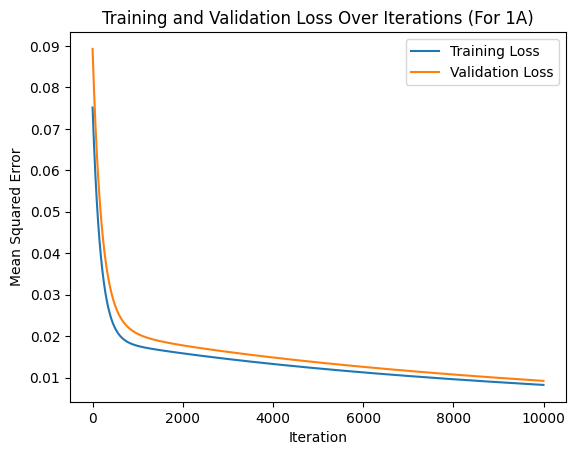

0.00825433169013901


In [1029]:
plt.plot(train_losses, label="Training Loss")
plt.plot(val_losses, label="Validation Loss")
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.title("Training and Validation Loss Over Iterations (For 1A)")
plt.show()
print(train_losses[-1])

Problem 1b

In [1030]:
#Organization
HD_train, HD_test = train_test_split(HD, train_size = 0.8, test_size = 0.2, random_state = 100)
#mainroad, guestroom, basement, hotwaterheating, airconditioning, prefarea
num_vars_b = ['area', 'bedrooms', 'bathrooms', 'stories','mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea', 'price']

HD_train[num_vars_b] = scalar.fit_transform(HD_train[num_vars_b])
HD_test[num_vars_b] = scalar.fit_transform(HD_test[num_vars_b])
HD_train = HD_train[num_vars_b]
HD_test = HD_test[num_vars_b]
HD_train_y = HD_train.pop('price')
HD_test_y = HD_test.pop('price')

HD_train.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
22,0.432609,0.4,0.000000,0.000000,1.0,1.0,1.0,0.0,1.0,0.333333,0.0
41,0.314954,0.4,0.333333,1.000000,1.0,0.0,0.0,0.0,1.0,0.000000,1.0
91,0.342105,0.2,0.000000,0.000000,1.0,1.0,1.0,0.0,0.0,0.666667,1.0
118,0.319131,0.4,0.000000,0.000000,1.0,0.0,1.0,0.0,1.0,0.000000,1.0
472,0.124896,0.6,0.000000,0.333333,1.0,0.0,0.0,0.0,0.0,1.000000,0.0


In [1031]:
#Training Set

train_b = HD_train.values[:,0]
test_b = HD_test.values[:,0]

In [1032]:
#Training and Validation Losses for 1B
itr = 10000
a = 0.001

x_train_b = np.c_[np.ones((len(HD_train), 1)), HD_train]
x_val_b = np.c_[np.ones((len(HD_test), 1)), HD_test]

theta12_b, train_losses, val_losses = gradient_descent(x_train_b, x_val_b, train_b, test_b, theta12_b, alpha, itr)

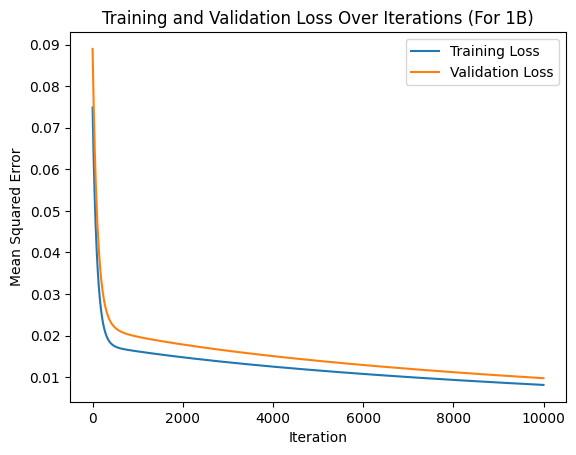

0.008116885654493053


In [1033]:
plt.plot(train_losses, label="Training Loss")
plt.plot(val_losses, label="Validation Loss")
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.title("Training and Validation Loss Over Iterations (For 1B)")
plt.show()
print(train_losses[-1])

Question 2A

In [1034]:
#Preprocessing: Normilaztion (0-1) and Standardization (mean removal)
train, test = train_test_split(HD, train_size = 0.8, test_size = 0.2, random_state = 100) #Removed HD to reduce characters

Nscalar = MinMaxScaler()
Sscalar = StandardScaler()

theta6_2a = np.zeros(6)
theta12_2b = np.zeros(12)
train_2a = HD_train.values[:,0]
test_2a = HD_test.values[:,0]


HD_train.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
22,0.432609,0.4,0.000000,0.000000,1.0,1.0,1.0,0.0,1.0,0.333333,0.0
41,0.314954,0.4,0.333333,1.000000,1.0,0.0,0.0,0.0,1.0,0.000000,1.0
91,0.342105,0.2,0.000000,0.000000,1.0,1.0,1.0,0.0,0.0,0.666667,1.0
118,0.319131,0.4,0.000000,0.000000,1.0,0.0,1.0,0.0,1.0,0.000000,1.0
472,0.124896,0.6,0.000000,0.333333,1.0,0.0,0.0,0.0,0.0,1.000000,0.0


Q2A - Normalization

In [1035]:
#Norming
train[num_vars_a] = Nscalar.fit_transform(train[num_vars_a])
test[num_vars_a] = Nscalar.fit_transform(test[num_vars_a])
train = train[num_vars_a]
test = test[num_vars_a]
train_y = train.pop('price')
test_y = test.pop('price')


In [1036]:
a = 0.001
itr = 1000

x_train_2a_n = np.c_[np.ones((len(train), 1)), train]
x_val_2a_n = np.c_[np.ones((len(test), 1)), test]

theta6_2a, train_losses, val_losses = gradient_descent(x_train_2a_n, x_val_2a_n, train_2a, test_2a, theta6_2a, alpha, itr)

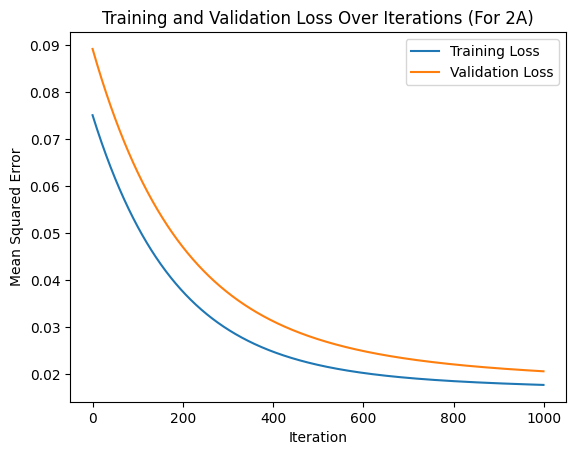

0.01766771570857502


In [1037]:
#Training and validation losses for both training and validation set based on input standardization and input normalization
plt.plot(train_losses, label="Training Loss")
plt.plot(val_losses, label="Validation Loss")
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.title("Training and Validation Loss Over Iterations (For 2A)")
plt.show()
print(train_losses[-1])

Q2A - Standardization

In [1038]:
#Standardizing
train, test = train_test_split(HD, train_size = 0.8, test_size = 0.2, random_state = 100)

train[num_vars_a] = Sscalar.fit_transform(train[num_vars_a])
test[num_vars_a] = Sscalar.fit_transform(test[num_vars_a])
train = train[num_vars_a]
test = test[num_vars_a]
train_y = train.pop('price')
test_y = test.pop('price')


In [1039]:
#Training and Validation Losses for 2A
itr = 1000
alpha = 0.01

x_train_2a_s = np.c_[np.ones((len(train), 1)), train]
x_val_2a_s = np.c_[np.ones((len(test), 1)), test]

theta6_2a, train_losses, val_losses = gradient_descent(x_train_2a_s, x_val_2a_s, train_2a, test_2a, theta6_2a, alpha, itr)

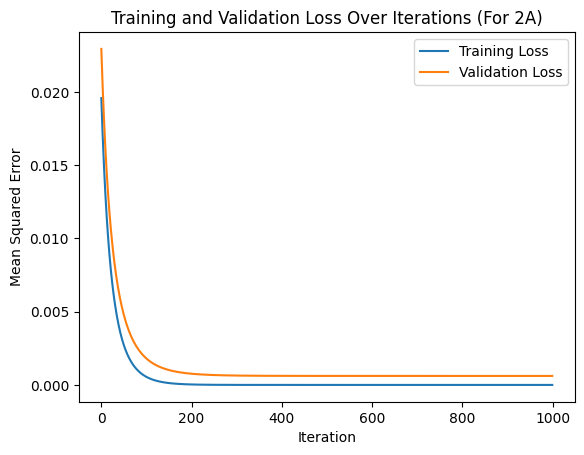

1.4700590936506773e-14


In [1040]:
#Training and validation losses for both training and validation set based on input standardization and input normalization [Stando]
plt.plot(train_losses, label="Training Loss")
plt.plot(val_losses, label="Validation Loss")
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.title("Training and Validation Loss Over Iterations (For 2A)")
plt.show()
print(train_losses[-1])

Question 2B

In [1041]:
train, test = train_test_split(HD, train_size = 0.8, test_size = 0.2, random_state = 100) #Removed HD to reduce characters

train_2b = HD_train.values[:,0]
test_2b = HD_test.values[:,0]

HD_train.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
22,0.432609,0.4,0.000000,0.000000,1.0,1.0,1.0,0.0,1.0,0.333333,0.0
41,0.314954,0.4,0.333333,1.000000,1.0,0.0,0.0,0.0,1.0,0.000000,1.0
91,0.342105,0.2,0.000000,0.000000,1.0,1.0,1.0,0.0,0.0,0.666667,1.0
118,0.319131,0.4,0.000000,0.000000,1.0,0.0,1.0,0.0,1.0,0.000000,1.0
472,0.124896,0.6,0.000000,0.333333,1.0,0.0,0.0,0.0,0.0,1.000000,0.0


Q2B - Normalization

In [1042]:
#Norming
train[num_vars_b] = Nscalar.fit_transform(train[num_vars_b])
test[num_vars_b] = Nscalar.fit_transform(test[num_vars_b])
train = train[num_vars_b]
test = test[num_vars_b]
train_y = train.pop('price')
test_y = test.pop('price')

In [1043]:
#Training and Validation Losses for 2B [Norm]\
alpha = 0.01
itr = 1000

x_train_2B_N = np.c_[np.ones((len(train), 1)), train]
x_val_2B_N = np.c_[np.ones((len(test), 1)), test]

theta6_2a, train_losses, val_losses = gradient_descent(x_train_2B_N, x_val_2B_N, train_2b, test_2b, theta12_2b, alpha, itr)

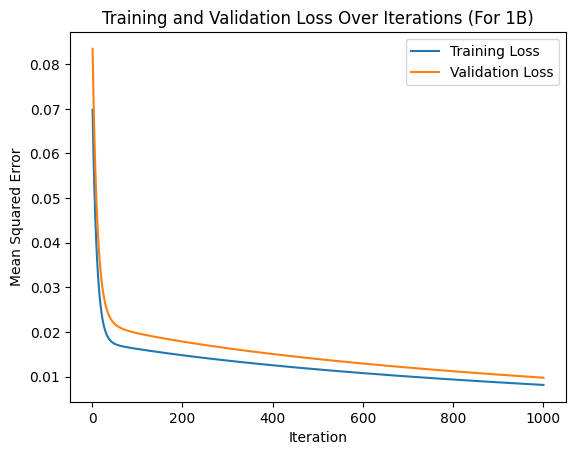

0.008115896966024291


In [1044]:
plt.plot(range(1,itr + 1), train_losses, label="Training Loss")
plt.plot(range(1, itr + 1), val_losses, label="Validation Loss")
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.title("Training and Validation Loss Over Iterations (For 1B)")
plt.show()
print(train_losses[-1])

Q2B - Standardization

In [1045]:
#Stando
train, test = train_test_split(HD, train_size = 0.8, test_size = 0.2, random_state = 100)

train[num_vars_b] = Sscalar.fit_transform(train[num_vars_b])
test[num_vars_b] = Sscalar.fit_transform(test[num_vars_b])
train = train[num_vars_b]
test = test[num_vars_b]
train_y = train.pop('price')
test_y = test.pop('price')

In [1046]:
#Training and Validation Losses for 2B [Stando]
alpha = 0.01
itr = 1000

x_train_2B_S = np.c_[np.ones((len(train), 1)), train]
x_val_2B_S = np.c_[np.ones((len(test), 1)), test]

theta6_2a, train_losses, val_losses = gradient_descent(x_train_2B_S, x_val_2B_S, train_2b, test_2b, theta12_2b, alpha, itr)

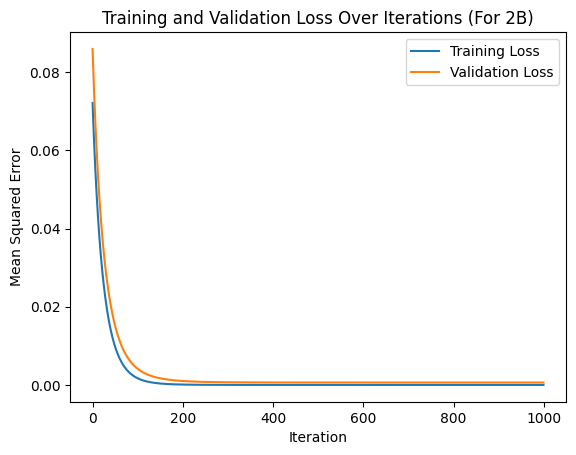

4.104681621971384e-11


In [1047]:
plt.plot(train_losses, label="Training Loss")
plt.plot(val_losses, label="Validation Loss")
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.title("Training and Validation Loss Over Iterations (For 2B)")
plt.show()
print(train_losses[-1])

Question 3

In [1048]:
#Gradient Descent FN w/ Penalty

